In [1]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [68]:
sim = rebound.Simulation("full_ss.bin")
sim.add(primary=sim.particles[0],
        m=6.538e-17, 
        a=0.9976970059775866,
        e=0.5148441284523386,
        inc=19.80627854737007 * np.pi/180., 
        pomega=43.83758142464817 * np.pi/180.) # cruithne JPL values inc and pomega converted to radians

#sim.particles[-1].x=1.121660037642544
#sim.particles[-1].y=-6.649762463777493e-1
#sim.particles[-1].z=-4.591087387216561e-1

sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.002440453964296729 y=0.005489224605127348 z=-0.00013525368758861227 vx=-0.0002833107752088114 vy=0.00033040142399894844 vz=6.374801705513502e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.33990810863922605 y=0.06564233356895202 z=-0.02617925494523407 vx=-0.6034896186526787 vy=1.6835942515427305 vz=0.19288859079367404>
<rebound.Particle object, m=2.4478382877847715e-06 x=0.07831545903583131 y=0.7214471343054191 z=0.005307111417273826 vx=-1.1735783070103931 vy=0.11824006541500576 vz=0.0693304019678162>
<rebound.Particle object, m=3.040432648022642e-06 x=0.9584000928431022 y=-0.315821165566365 z=-0.00012610612303502752 vx=0.3020790942768657 vy=0.944627022006032 vz=-3.411624282

In [ ]:
sim.particles[-1].x=1.121660037642544
sim.particles[-1].y=-6.649762463777493e-1
sim.particles[-1].z=-4.591087387216561e-1
sim.particles[-1].a=0.9976970059775866
sim.particles[-1].e=0.5148441284523386
sim.particles[-1].inc=19.80627854737007 * np.pi/180.
sim.particles[-1].pomega=43.83758142464817 * np.pi/180.

In [72]:
sim = rebound.Simulation("sim_bins/ss.bin")
sim.add(m=6.538e-17,
        x=1.121660037642544,
        y=-6.649762463777493e-1,
        z=-4.591087387216561e-1,
        vx=sim.particles[3].vx + 8.947280192100324e-03,
        vy=sim.particles[3].vy + 7.079169757562227e-03,
        vz=sim.particles[3].vz - 1.164138158405735E-03)

sim.add("NAME= 1986 TO;")

sim.status()

Searching NASA Horizons for 'NAME= 1986 TO;'... Found: 3753 Cruithne (1986 TO).
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	7
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139143380212697 y=-0.002792019770161695 z=0.0002061838852554664 vx=0.00031241890630844004 vy=-0.0004308175076914913 vz=-5.477740167511035e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.1478672233442572 y=-0.4466929775364947 z=-0.02313937582786785 vx=1.2309105821421804 vy=-0.41305345498361457 vz=-0.14666379884253236>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7257693602841775 y=-0.02529582082587794 z=0.041378025262080086 vx=0.030165331589789884 vy=-1.1808763946096659 vz=-0.017862281779832963>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.17568959237103887 y=0.96597163890

/usr/local/lib/python3.7/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


(<Figure size 576x576 with 3 Axes>,
 <matplotlib.axes._axes.Axes at 0x12594b250>)

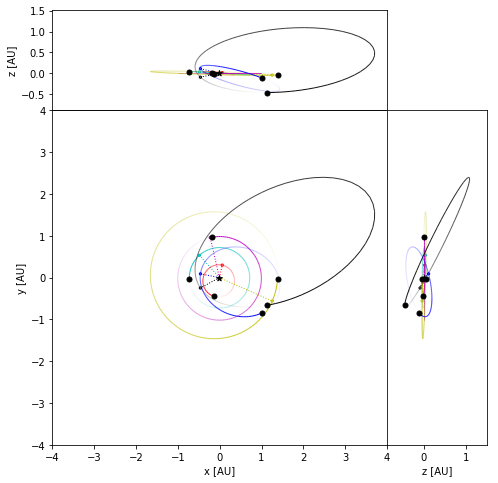

In [73]:
rebound.OrbitPlot(sim, slices=0.3, unitlabel="[AU]", color=True, periastron=True, xlim=[-4.,4.], ylim=[-4.,4.])

In [60]:
x_data1 = []
y_data1 = []
x_data2 = []
y_data2 = []
x_data3 = []
y_data3 = []

In [61]:
times = 100*365

for i in range(times):
    sim.dt = sim.particles[3].P/(365.)
#   sim.integrate(sim.t+0.001)
    sim.step()
    cruithne_values = sim.particles[-1]
    earth_values = sim.particles[3]
    sun_values = sim.particles[0]
    x_data1.append((cruithne_values.x - earth_values.x))
    y_data1.append((cruithne_values.y - earth_values.y))
    x_data2.append(earth_values.x - earth_values.x)
    y_data2.append(earth_values.y - earth_values.y)
    x_data3.append(sun_values.x)
    y_data3.append(sun_values.y)

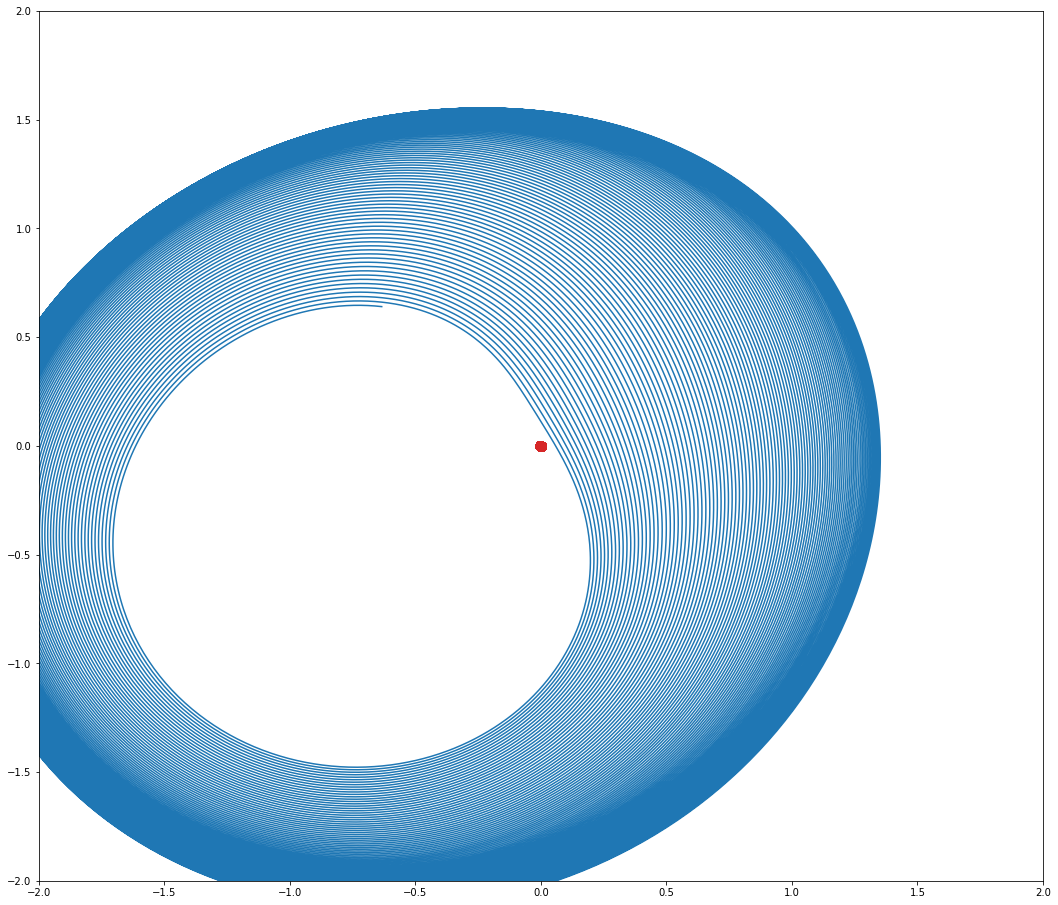

In [67]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(1,1,1)
ax.plot(x_data1, y_data1, color='tab:blue')
ax.plot(x_data2, y_data2, color='tab:cyan', marker='^')
ax.plot(x_data3, y_data3, color='tab:red', marker='o')
#fig, ax = plt.subplots()
#ax.plot(x_list, y_list)
ax.set_xlim([-2,2.])
ax.set_ylim([-2,2.])
plt.show()